<a href="https://colab.research.google.com/github/Smarth2005/Machine-Learning/blob/main/KNN_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### K- Nearest Neighbors - I
Dataset : Classified Data <br>
Dataset Source: https://www.kaggle.com/datasets/aayushmishra1512/classifieddata

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Get the data.<br>
Set index_col = 0 to use the first column as index.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Classified Data.txt to Classified Data (2).txt


In [ ]:
df = pd.read_csv("Classified Data.txt", index_col = 0)

In [ ]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


#### Standardize the Variables
Because the KNN classifier predicts the class of a given test observation (query point) by identifying the observations that are nearest to it, the scale of the variables matters. Any variable sthat are on a large scale will have a much lager effect on the distance between the observations, and hence on the KNN Classifier, than variables that are on a small scale.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_features = scaler.fit_transform(df.drop('TARGET CLASS', axis=1))

In [ ]:
df_features = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


#### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_features, df['TARGET CLASS'], test_size = 0.30)

#### Using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Predictions and Evaluations

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score:  0.9
Confusion Matrix:
 [[132  18]
 [ 12 138]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       150
           1       0.88      0.92      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



#### Choosing a K value using Elbow method

In [ ]:
error_rate = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

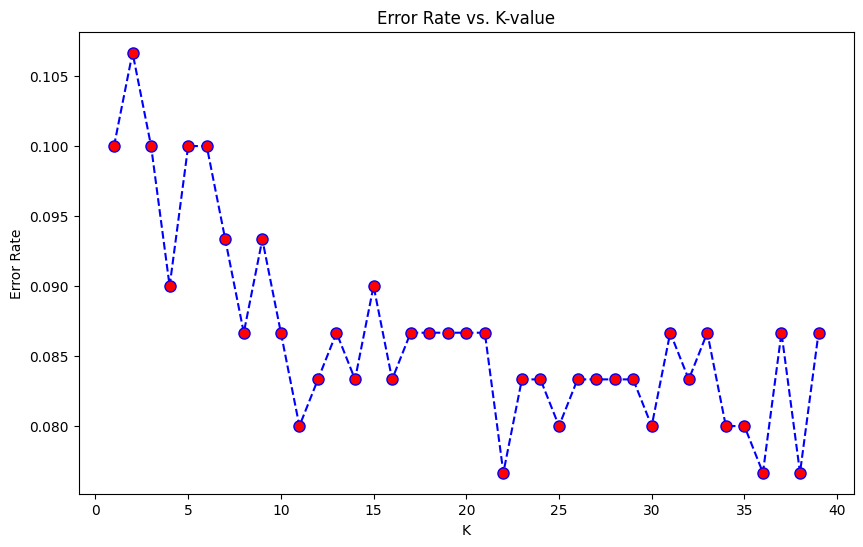

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',
          markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K-value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# Choosing K=22
knn = KNeighborsClassifier(n_neighbors=22)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print("With K=22")
print("\n")
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("\n")
print("Classification Report:")
print(classification_report(y_test, pred))

With K=22


Accuracy Score:  0.9233333333333333
Confusion Matrix:
 [[135  15]
 [  8 142]]


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       150
           1       0.90      0.95      0.93       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



#### Choosing K-value by Cross-Validation

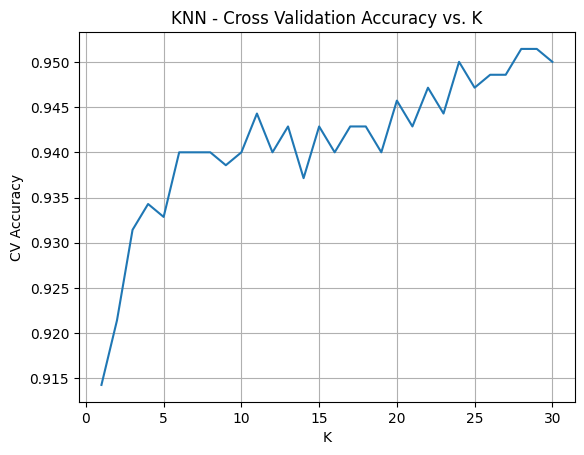

In [ ]:
from sklearn.model_selection import cross_val_score

k_range = range(1, 31)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

plt.plot(k_range, cv_scores)
plt.xlabel('K')
plt.ylabel('CV Accuracy')
plt.title('KNN - Cross Validation Accuracy vs. K')
plt.grid(True)
plt.show()
